<a href="https://colab.research.google.com/github/Xavian-Yunos/HW03-Homework/blob/main/VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [2]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output [3:0] count,
    output ten
);

//YOUR CODE HERE

reg [3:0] count;
reg ten;

always @(posedge clk)
begin
    if (rst != 1'b0)  //rst high
        begin
        count = 4'b0000;  // count = 0
        ten = 1'b0; // ten = 0
        end

    else if (count == 4'b1001)
        begin
        count = 4'b0000;
        ten = ten + 1'b1;
        end

    else
        begin
        count = count + 1'b1; //count up
        ten = 1'b0;
        end
end

endmodule

////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0]count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

always begin

    #10 clk=~clk; //YOUR CODE HERE - Generate 20 unit time clock;

end

initial
    begin
    $dumpfile("decade_counter.vcd");
    $dumpvars(0, decade_counter_tb);
    clk = 1'b0;
    rst = 1'b1;
    #30 rst = 1'b0;
    #430 $finish;

    //YOUR CODE HERE - Initialize the clk, rst;

end

    //initial
    //$monitor($time, " clk=%b,rst=%b,count[3:0]=%b,ten=%b",clk,rst,count,ten);

endmodule

VCD info: dumpfile decade_counter.vcd opened for output.



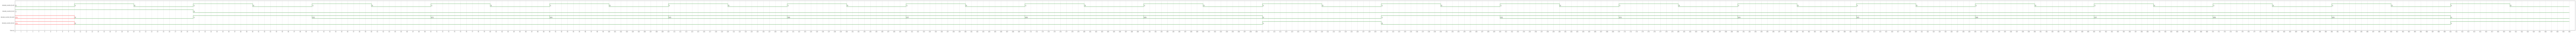

In [ ]:
%%waveform decade_counter.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']
time_begin = 0
time_end = 430
base = 'dec'

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

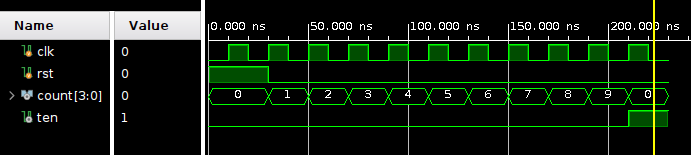

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output [1:0]X
);

//YOUR CODE HERE
//TIPS: IN THE VERILOG CASE STATEMENT, YOU HAVE TO LIST ALL CONDITION TO AVIOD ANY AMBIGUOUS STATEMENT;
reg [1:0]X;
always @(*)
begin
case(SEL)
2'b00: X = A;
2'b01: X = B;
2'b10: X = C;
2'b11: X = D;
default: X = 2'bxx;
endcase
end

endmodule

//TESTBENCH HERE
module multiplexer_tb;
    wire [1:0]X;
    reg [1:0]SEL;
    reg [1:0]A;
    reg [1:0]B;
    reg [1:0]C;
    reg [1:0]D;


multiplexer dut(A,B,C,D,SEL,X);
initial begin
$dumpfile("multiplexer.vcd");
$dumpvars;
A = 2'b00;
B = 2'b01;
C = 2'b01;
D = 2'b11;
SEL = 2'b00;

#10 SEL = 2'b01;
#10 SEL = 2'b10;
#10 SEL = 2'b11;
#10 $finish;
end
endmodule





VCD info: dumpfile multiplexer.vcd opened for output.



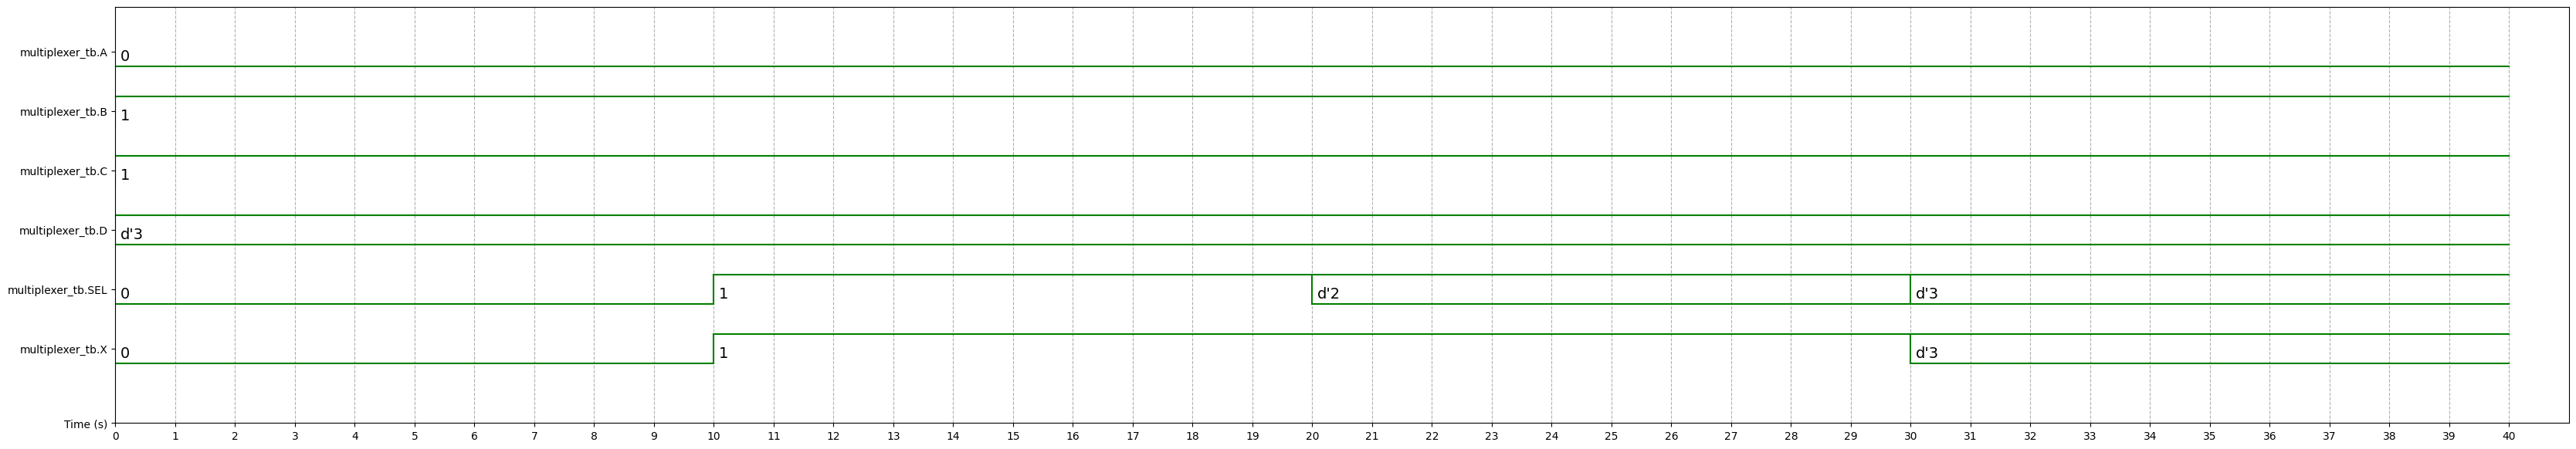

In [ ]:
%%waveform multiplexer.vcd
sign_list= ["multiplexer_tb.A","multiplexer_tb.B","multiplexer_tb.C","multiplexer_tb.D","multiplexer_tb.SEL","multiplexer_tb.X" ]
time_begin = 0
time_end = 40
base ='dec'

5. Here is a demo testbench result for the multiplexer;

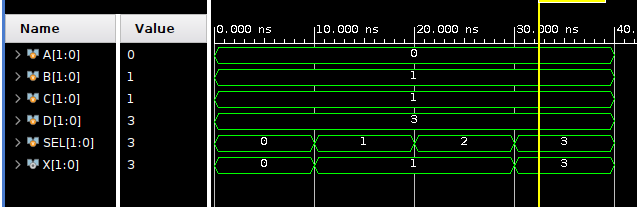

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [25]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output [1:0]W,
    output [1:0]X,
    output [1:0]Y,
    output [1:0]Z
    );

//YOUR CODE HERE
reg [1:0]W;
reg [1:0]X;
reg [1:0]Y;
reg [1:0]Z;

always @(*) begin
W = 2'b00;
X = 2'b00;
Y = 2'b00;
Z = 2'b00;

case (SEL)
    2'b00: W = A;
    2'b01: X = A;
    2'b10: Y = A;
    2'b11: Z = A;
    default;
endcase
end
endmodule


//TESTBENCH HERE

module demultiplexer_tb;
reg [1:0]A;
reg [1:0]SEL;
wire [1:0]W;
wire [1:0]X;
wire [1:0]Y;
wire [1:0]Z;

demultiplexer dut(A,SEL,W,X,Y,Z);
initial A[0] = 0; always #1 A[0] = ~A[0];
initial A[1] = 0; always #2 A[1] = ~A[1];
initial SEL[0] = 0; always #1 SEL[0] = ~SEL[0];
initial SEL[1] = 0; always #2 SEL[1] = ~SEL[1];
initial begin $dumpfile("demultiplexer.vcd"); $dumpvars; #5 $finish; $dumpoff;
/*
SEL = 2'b00;
A = 2'b00;
#10 SEL = 2'b01;
A = 2'b01;
#10 SEL = 2'b10;
#10 SEL = 2'b11;
A = 2'b11;
#10 $finish;
*/
end
endmodule

VCD info: dumpfile demultiplexer.vcd opened for output.



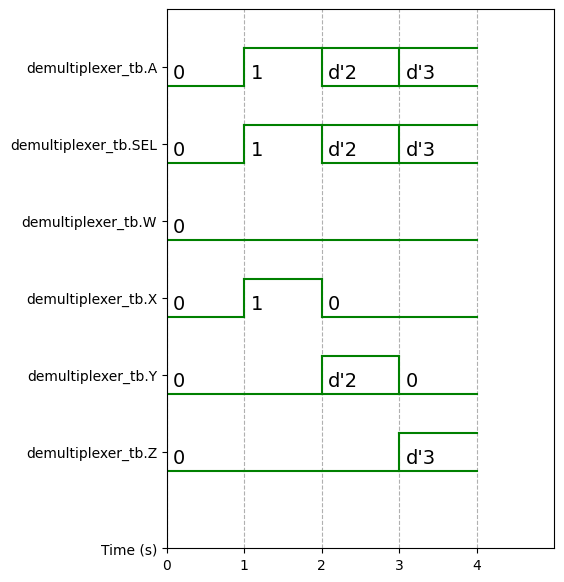

In [26]:
%%waveform demultiplexer.vcd
sign_list = ["demultiplexer_tb.A","demultiplexer_tb.SEL","demultiplexer_tb.W","demultiplexer_tb.X","demultiplexer_tb.Y","demultiplexer_tb.Z"]
time_begin = 0
time_end = 4
base = 'dec'

5. Here is a demo testbench result for the demultiplexer;

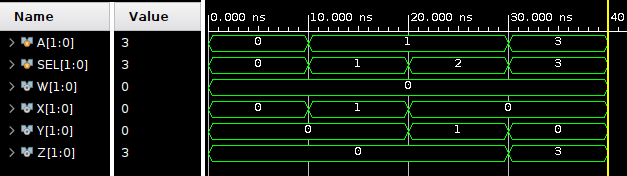

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [17]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output [4:0]q
);
//YOUR CODE HERE
reg q;
always @(*) begin
  if (ctrl == 0)
    begin
    q = A[3:0] + B[3:0];
    end

  else
    begin
    q = A[7:4] + B[7:4];
    end
  end
endmodule

//TESTBENCH HERE
module nibbleadd_tb;
  reg [7:0]A;
  reg [7:0]B;
  reg ctrl;
  wire [4:0]q;

  nibbleadd dut(A,B,ctrl,q);
initial A[0] = 0; always #1 A[0] = ~A[0];
initial A[1] = 0; always #2 A[1] = ~A[1];
initial A[2] = 0; always #4 A[2] = ~A[2];
initial A[3] = 0; always #8 A[3] = ~A[3];
initial A[4] = 0; always #16 A[4] = ~A[4];
initial A[5] = 0; always #32 A[5] = ~A[5];
initial A[6] = 0; always #64 A[6] = ~A[6];
initial A[7] = 0; always #128 A[7] = ~A[7];
initial B[0] = 0; always #256 B[0] = ~B[0];
initial B[1] = 0; always #512 B[1] = ~B[1];
initial B[2] = 0; always #1024 B[2] = ~B[2];
initial B[3] = 0; always #2048 B[3] = ~B[3];
initial B[4] = 0; always #4096 B[4] = ~B[4];
initial B[5] = 0; always #8192 B[5] = ~B[5];
initial B[6] = 0; always #16384 B[6] = ~B[6];
initial B[7] = 0; always #32768 B[7] = ~B[7];
initial ctrl = 0; always #65536 ctrl = ~ctrl;
initial begin $dumpfile("nibbleadd.vcd"); $dumpvars(); #131072 $finish; $dumpoff;

  end
endmodule

VCD info: dumpfile nibbleadd.vcd opened for output.



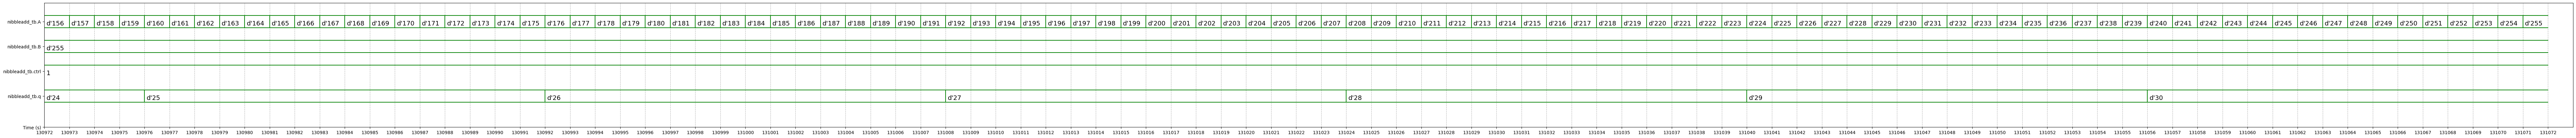

In [18]:
%%waveform nibbleadd.vcd
sign_list = ['nibbleadd_tb.A','nibbleadd_tb.B','nibbleadd_tb.ctrl','nibbleadd_tb.q']
time_begin = 130972
time_end = 131072
base = 'dec'

5. Here is a demo testbench result for the nibbleadd;

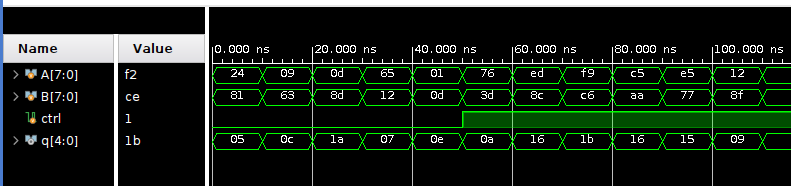

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [3]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output [4:0] q
);

reg q;
always @(*)
begin
  if (rst == 1)
    begin
    q = 5'b00000;
    end

  else
  if (ctrl == 0)
    begin
    q = A + B;
    end

  else
    begin
    q = A - C;
    end
end

endmodule

//TESTBENCH
module CCTA_tb;

wire [4:0]q;
reg [3:0]A;
reg [3:0]B;
reg [3:0]C;
reg rst;
reg ctrl;

CCTA dut(A, B, C, rst, ctrl, q);
initial A[0] = 0; always #1 A[0] = ~A[0];
initial A[1] = 0; always #2 A[1] = ~A[1];
initial A[2] = 0; always #4 A[2] = ~A[2];
initial A[3] = 0; always #8 A[3] = ~A[3];
initial B[0] = 0; always #16 B[0] = ~B[0];
initial B[1] = 0; always #32 B[1] = ~B[1];
initial B[2] = 0; always #64 B[2] = ~B[2];
initial B[3] = 0; always #128 B[3] = ~B[3];
initial C[0] = 0; always #256 C[0] = ~C[0];
initial C[1] = 0; always #512 C[1] = ~C[1];
initial C[2] = 0; always #1024 C[2] = ~C[2];
initial C[3] = 0; always #2048 C[3] = ~C[3];
initial ctrl = 0; always #4096 ctrl = ~ctrl;
initial rst = 1; always #1 rst = 0;
initial begin $dumpfile("CCTA.vcd"); $dumpvars(); #8193 $finish; $dumpoff;

end
endmodule


Installing. Please wait... done!
VCD info: dumpfile CCTA.vcd opened for output.



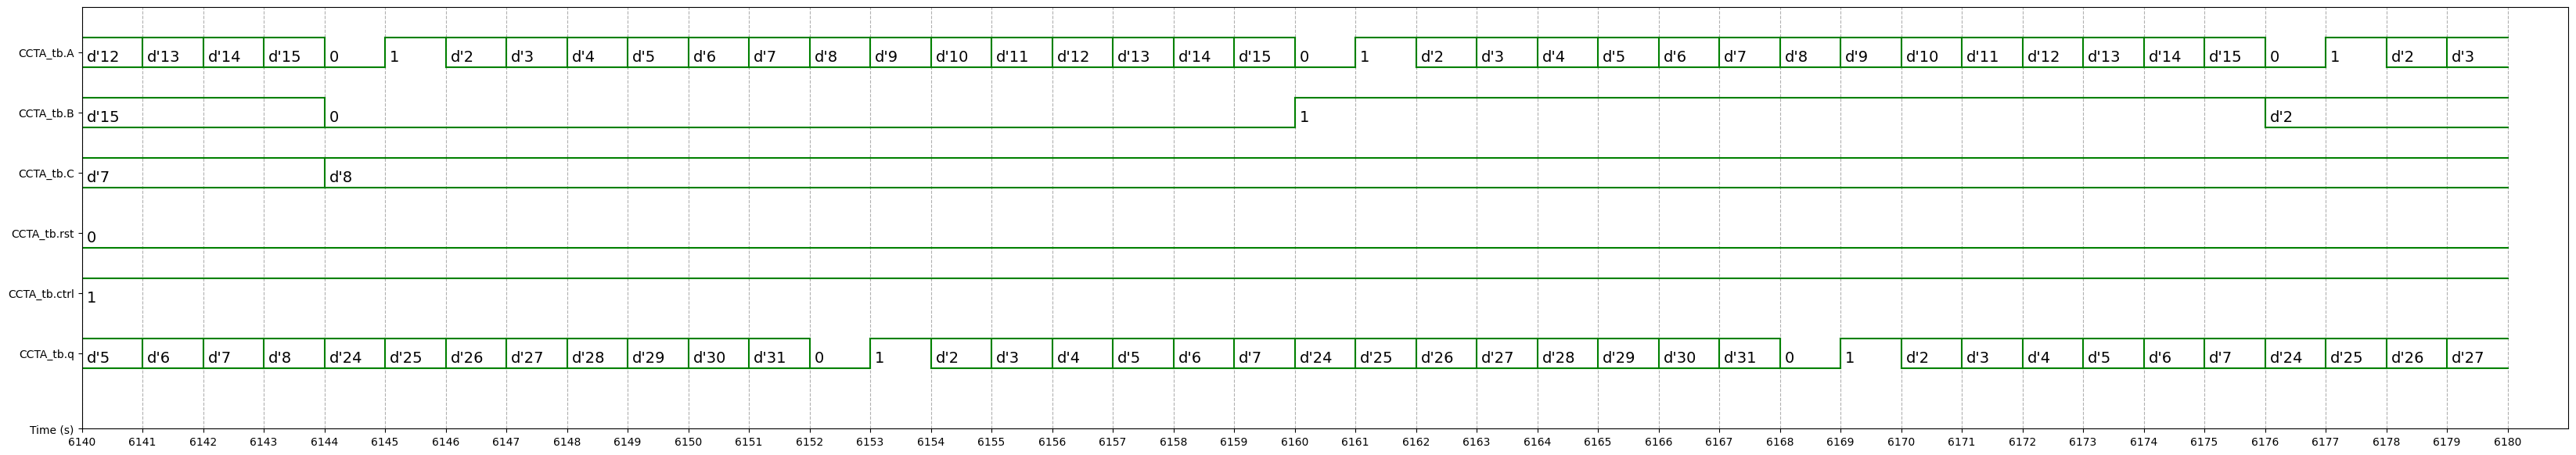

In [7]:
%%waveform CCTA.vcd
sign_list = ['CCTA_tb.A','CCTA_tb.B','CCTA_tb.C','CCTA_tb.rst','CCTA_tb.ctrl','CCTA_tb.q']
time_begin = 6140
time_end = 6180
base = 'dec'

5. Here is a demo testbench result for the CCTA;

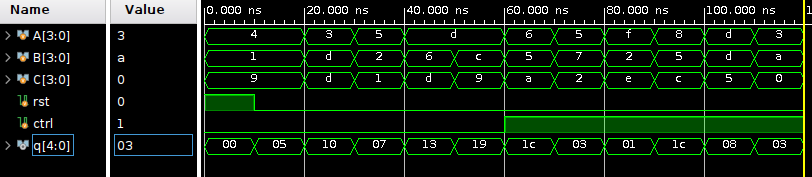